In [ ]:
# Reconstructing 

In [1]:
from polyode.data_utils.GP_data_utils import generate_gp_data
from polyode.models.poly_utils import get_cns, get_mu_covar
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
X1, y1, X2, y2, post_cov = generate_gp_data(n1 = 5,n2 = 500,ny = 1, l_kernel = 10,domain = [0,10])
# shifting the function to be applying from t = 0 to 2

In [6]:
Nc = 32 # dimension of the coefficients
Delta = 5 # width of the reconstruction window (where mu >0)
A = np.ones((Nc,Nc))
B = np.ones(Nc)
for n in range(Nc):
    B[n] = (1/Delta) * ((2*n+1)**0.5)
    for k in range(Nc):
        if k<=n:
            A[n,k] = - (1/Delta)*((2*n+1)**(0.5))*((2*k+1)**(0.5)) * 1
        else:
            A[n,k] = - (1/Delta)*((2*n+1)**(0.5))*((2*k+1)**(0.5)) * (-1)**(n-k)

def input_func(t,x,y):
    return np.interp(t,x,y)

def dc_dt(c,t,f):
    return A @ c + B*f(t)

In [7]:
T_end = 10
start_cn = np.zeros(Nc)
#start_cn[0] = input_func(0,x=X2[:,0],y=y2[0])
pred_c = odeint(dc_dt,y0 = start_cn,t = np.linspace(0,T_end),args =(lambda t: input_func(t,x=X2[:,0],y=y2[0]),))

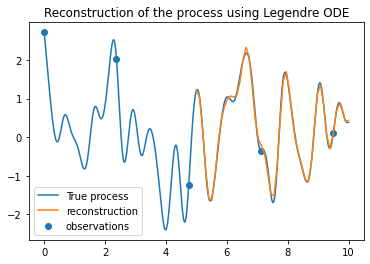

In [13]:
plt.plot(X2,y2.T, label = "True process")
rec_span = np.linspace(5,10)
recs = np.polynomial.legendre.legval((2/Delta)*(rec_span-T_end) + 1, pred_c[-1] * [(2*n+1)**0.5 for n in range(Nc)])
plt.plot(rec_span,recs, label = "reconstruction")
plt.scatter(X1,y1,label = "observations")
plt.title("Reconstruction of the process using Legendre ODE")
plt.legend()
plt.show()